# Example of events generation
## 1. Generate python data structure

In [1]:
import sys
sys.path.append('../')

In [2]:
import jax
import jax.numpy as np
import jax.random as rjax
import numpy as onp
rng = rjax.PRNGKey(seed=10)

/home/vitaly/miniconda3/envs/tf2/lib/python3.8/site-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [3]:
from helixgen.phspdecay import generate
import helixgen.resolution as res

In [4]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)
matplotlib.rc('font', size=18)

<!-- Generate 10000 events of the $D^+ \to [K^{*0} \to K^-\pi^+]\pi^+$ decay -->
Generate $D^0 \to [K_S^0 \to \pi^+ \pi^-] \pi^+ \pi^-$ decay events

In [5]:
smearer = lambda rng, gp: res.apply_resolution(
    rng, gp,
    res.apply_resolution_neutral_cartesian,
    res.apply_resolution_charged_cartesian)

In [6]:
%%time
w, events = generate(rng, '', 5000, smearer)

CPU times: user 6.92 s, sys: 76.5 ms, total: 7 s
Wall time: 6.92 s


Weights distribution

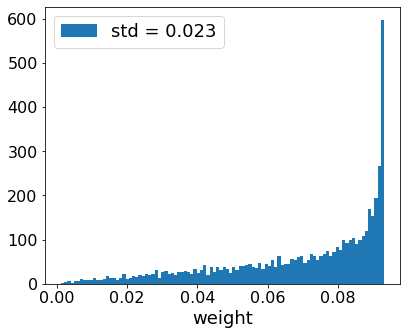

In [7]:
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(w, bins=100, label=f'std = {w.std():.3f}');
ax.set_xlabel('weight')
ax.legend()
fig.tight_layout()

In [8]:
jax.tree_map(np.shape, events)

{'Ks0': {'mom': Momentum(px=(5000,), py=(5000,), pz=(5000,)),
  'pcl': (),
  'pos': Position(x=(5000,), y=(5000,), z=(5000,))},
 'pi+': {'hel': Helix(d0=(5000,), phi0=(5000,), omega=(5000,), z0=(5000,), tanl=(5000,)),
  'meas_hel': Helix(d0=(5000,), phi0=(5000,), omega=(5000,), z0=(5000,), tanl=(5000,)),
  'meas_mom': Momentum(px=(5000,), py=(5000,), pz=(5000,)),
  'meas_pos': Position(x=(5000,), y=(5000,), z=(5000,)),
  'mom': Momentum(px=(5000,), py=(5000,), pz=(5000,)),
  'momcov': (5000, 3, 3),
  'pcl': (),
  'pos': Position(x=(5000,), y=(5000,), z=(5000,)),
  'poscov': (5000, 3, 3)},
 'pi+_Ks0': {'hel': Helix(d0=(5000,), phi0=(5000,), omega=(5000,), z0=(5000,), tanl=(5000,)),
  'meas_hel': Helix(d0=(5000,), phi0=(5000,), omega=(5000,), z0=(5000,), tanl=(5000,)),
  'meas_mom': Momentum(px=(5000,), py=(5000,), pz=(5000,)),
  'meas_pos': Position(x=(5000,), y=(5000,), z=(5000,)),
  'mom': Momentum(px=(5000,), py=(5000,), pz=(5000,)),
  'momcov': (5000, 3, 3),
  'pcl': (),
  'pos': Po

Generated position for all particles is zero since there is $D^+$ is at rest and $K^{*0}$ does not live long enough to fly any distance

In [9]:
def make_hist(ax, data, lbl, bins=100, rng=None):
    ax.hist(data, bins=bins, label=f'std = {data.std():.3f}\nmean = {data.mean():.3f}', range=rng);
    ax.set_xlabel(lbl)
    ax.legend()

In [10]:
def position_proj(ax, data):
    units = '1 / MeV'
    make_hist(ax[0], data.x, f'x gen ({units})')
    make_hist(ax[1], data.y, f'y gen ({units})')
    make_hist(ax[2], data.z, f'z gen ({units})')
    for a in ax:
        a.grid()
        a.minorticks_on()
        a.grid(which='minor', linestyle=':')

In [11]:
def momentum_proj(ax, data):
    units = 'MeV'
    make_hist(ax[0], data.px, fr'$p_x$ gen ({units})')
    make_hist(ax[1], data.py, fr'$p_y$ gen ({units})')
    make_hist(ax[2], data.pz, fr'$p_z$ gen ({units})')
    for a in ax:
        a.grid()
        a.minorticks_on()
        a.grid(which='minor', linestyle=':')

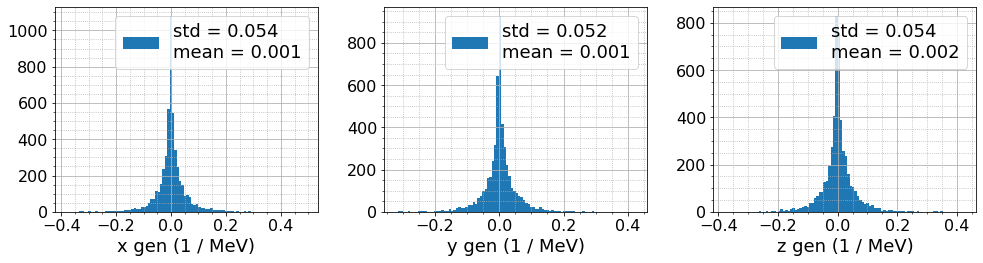

In [12]:
pip_gen_pos = events['pi+']['pos']
fig, ax = plt.subplots(ncols=3, figsize=(14, 4))
position_proj(ax, pip_gen_pos)
fig.tight_layout()

So, the measured position gives us the spatial resolution

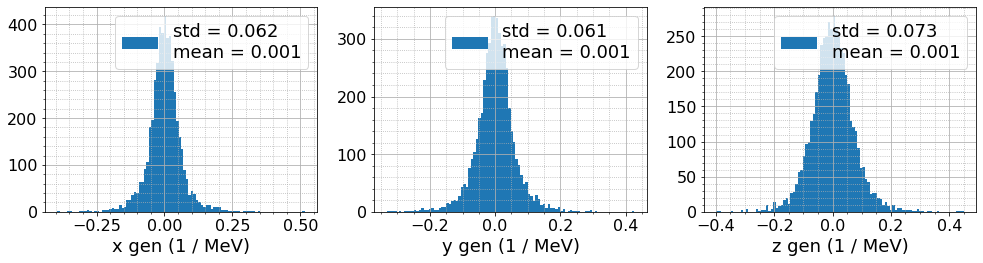

In [13]:
pip_meas_pos = events['pi+']['meas_pos']
fig, ax = plt.subplots(ncols=3, figsize=(14, 4))
position_proj(ax, pip_meas_pos)
fig.tight_layout()

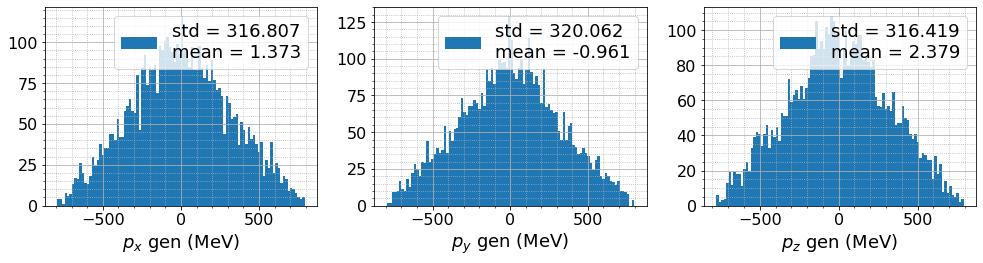

In [14]:
pip_gen_mom = events['pi+']['mom']
fig, ax = plt.subplots(ncols=3, figsize=(14, 4))
momentum_proj(ax, pip_gen_mom)
fig.tight_layout()

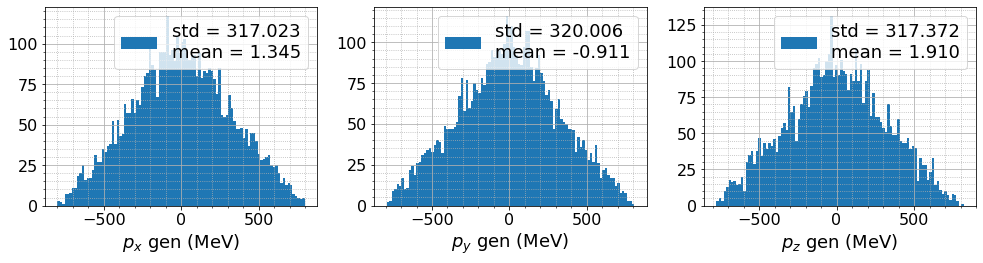

In [15]:
pip_meas_mom = events['pi+']['meas_mom']
fig, ax = plt.subplots(ncols=3, figsize=(14, 4))
momentum_proj(ax, pip_meas_mom)
fig.tight_layout()

Distribution of the helix parameters

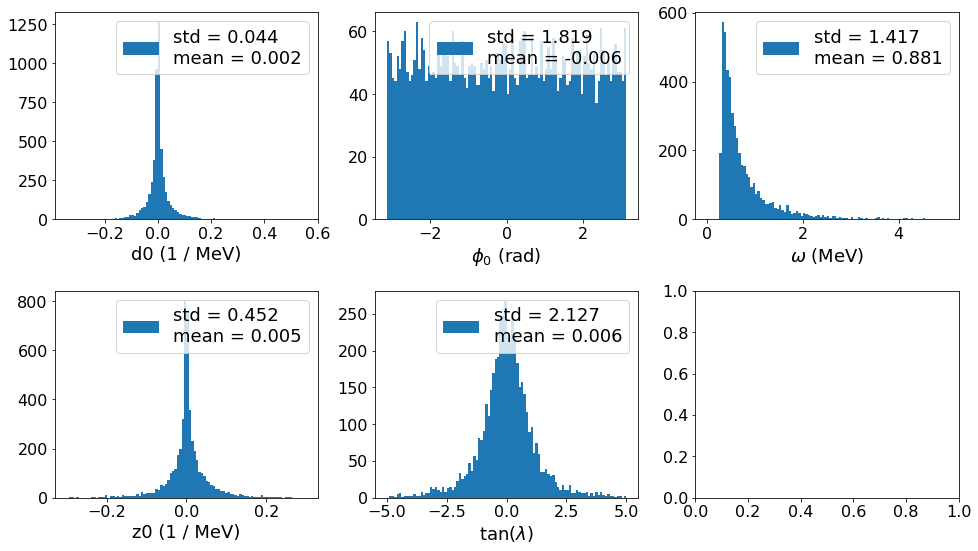

In [16]:
pip_helix = events['pi+']['hel']

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14, 8))
make_hist(ax[0,0], pip_helix.d0, 'd0 (1 / MeV)')
make_hist(ax[0,1], pip_helix.phi0, r'$\phi_{0}$ (rad)')
make_hist(ax[0,2], pip_helix.omega, r'$\omega$ (MeV)', rng=[0, 5])
make_hist(ax[1,0], pip_helix.z0, 'z0 (1 / MeV)', rng=[-0.3, 0.3])
make_hist(ax[1,1], pip_helix.tanl, 'tan($\lambda$)', rng=[-5, 5])
fig.tight_layout()